# Imports

In [1]:
from pathlib import Path

from geograypher.constants import DATA_FOLDER
from geograypher.entrypoints.project_detections import project_detections

# Set constants

In [2]:
DETECTIONS_DATA_FOLDER = Path(DATA_FOLDER, "example_detection")
INPUT_FOLDER = Path(DETECTIONS_DATA_FOLDER, "inputs")
INTERMEDIATE_FOLDER = Path(DETECTIONS_DATA_FOLDER, "intermediate_results")
OUTPUT_FOLDER = Path(DETECTIONS_DATA_FOLDER, "outputs")

CAMERAS_FILENAME = Path(INPUT_FOLDER, "hidden_little_cameras.xml")
MESH_FILENAME = Path(INPUT_FOLDER, "hidden_little_mesh.ply")
IMAGE_FOLDER = Path(INPUT_FOLDER, "images")
DETECTIONS_FOLDER = Path(INPUT_FOLDER, "detections")
ORTHO_FILENAME = Path(INPUT_FOLDER, "hidden_little_ortho.tif")

PROJECTIONS_TO_MESH_FILENAME = Path(
    INTERMEDIATE_FOLDER, "projections_to_mesh.npz"
)
PROJECTIONS_TO_GEOSPATIAL_SAVEFILENAME = Path(
    OUTPUT_FOLDER, "detections_projected_to_geospatial.geojson"
)

DEFAULT_FOCAL_LENGTH = 8688
PROJECT_TO_MESH = True
CONVERT_TO_GEOSPATIAL = True
VIS_MESH = True
VIS_GEODATA = True

# Projection detections to mesh
Here we take the per-image detections and project them onto the faces of the mesh. If requested, these projections can be visualized and/or saved to a file for further processing. Note that you could also could convert them to geospatial coordinates using this function, but it's split into two function calls to demonstrate the functionality.

Loading transform to EPSG:4326
Loading mesh
Reading the mesh
Selecting an ROI from mesh
Extracting faces from mesh
Loading texture


Aggregating projected viewpoints:   0%|          | 0/93 [00:00<?, ?it/s]/ofo-share/repos-david/conda/envs/geograypher/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Aggregating projected viewpoints: 100%|██████████| 93/93 [12:13<00:00,  7.89s/it]


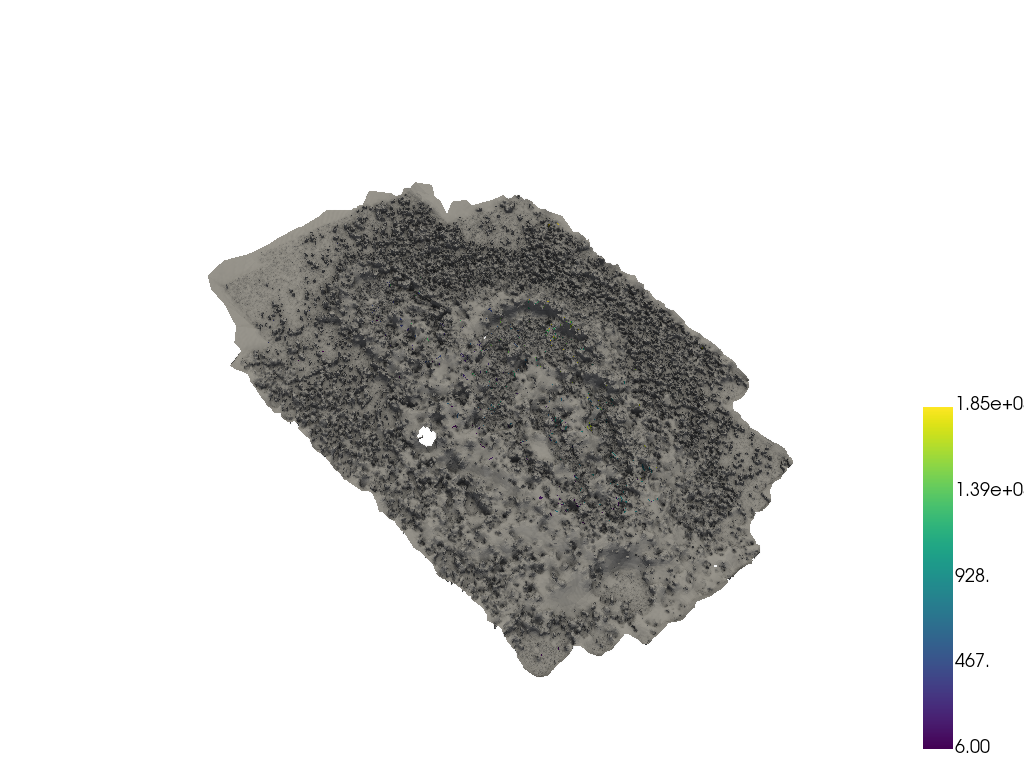

In [3]:
project_detections(
    mesh_filename=MESH_FILENAME,
    cameras_filename=CAMERAS_FILENAME,
    image_folder=IMAGE_FOLDER,
    detections_folder=DETECTIONS_FOLDER,
    projections_to_mesh_filename=PROJECTIONS_TO_MESH_FILENAME,
    projections_to_geospatial_savefilename=PROJECTIONS_TO_GEOSPATIAL_SAVEFILENAME,
    default_focal_length=DEFAULT_FOCAL_LENGTH,
    project_to_mesh=PROJECT_TO_MESH,
    vis_mesh=VIS_MESH,
)

# Convert mesh projections to geospatial
In the previous step, the per-image detections were projected to the mesh. Now, they are converted to a 2D, geospatial representation. This can be visualized and/or exported as desired.

Loading transform to EPSG:4326
Loading mesh
Reading the mesh
Selecting an ROI from mesh
Extracting faces from mesh
Loading texture
Computing working CRS
Computing faces in working CRS


Converting faces to polygons: 100%|██████████| 13489555/13489555 [03:35<00:00, 62498.30it/s]

Creating dataframe of faces


Creating dataframe of multipolygons
Plotting


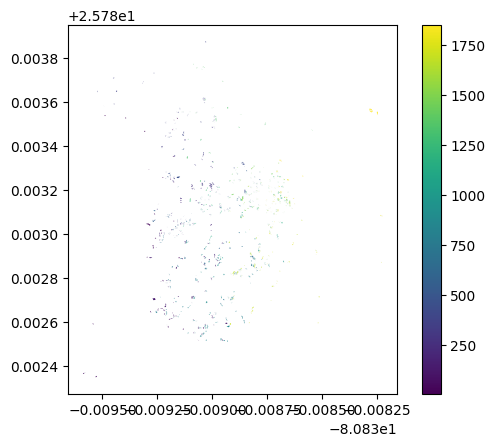

In [4]:
project_detections(
    mesh_filename=MESH_FILENAME,
    cameras_filename=CAMERAS_FILENAME,
    image_folder=IMAGE_FOLDER,
    detections_folder=DETECTIONS_FOLDER,
    projections_to_mesh_filename=PROJECTIONS_TO_MESH_FILENAME,
    projections_to_geospatial_savefilename=PROJECTIONS_TO_GEOSPATIAL_SAVEFILENAME,
    convert_to_geospatial=CONVERT_TO_GEOSPATIAL,
    vis_geodata=VIS_GEODATA,
)